<a href="https://colab.research.google.com/github/jdasam/aat3020-2023/blob/main/notebooks/2_Named_entity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Named Entity Recognition
- For a given word and its context window, estimate whether the given word is location or not

# 1. Download dataset
- CoNLL2003 

In [1]:
!wget https://data.deepai.org/conll2003.zip # Download dataset
!unzip conll2003.zip # Unzip dataset zip

--2023-04-06 06:15:29--  https://data.deepai.org/conll2003.zip
Resolving data.deepai.org (data.deepai.org)... 169.150.247.36, 2400:52e0:1500::1092:1
Connecting to data.deepai.org (data.deepai.org)|169.150.247.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 982975 (960K) [application/zip]
Saving to: ‘conll2003.zip’

conll2003.zip       100%[===================>] 959.94K   807KB/s    in 1.2s    

2023-04-06 06:15:31 (807 KB/s) - ‘conll2003.zip’ saved [982975/982975]

Archive:  conll2003.zip
  inflating: metadata                
  inflating: test.txt                
  inflating: train.txt               
  inflating: valid.txt               


## 2. Preprocess Dataset

In [2]:
with open("train.txt") as f:
  string = ''.join(f.readlines())
dataset = string.split('\n')

dataset[:70]

['-DOCSTART- -X- -X- O',
 '',
 'EU NNP B-NP B-ORG',
 'rejects VBZ B-VP O',
 'German JJ B-NP B-MISC',
 'call NN I-NP O',
 'to TO B-VP O',
 'boycott VB I-VP O',
 'British JJ B-NP B-MISC',
 'lamb NN I-NP O',
 '. . O O',
 '',
 'Peter NNP B-NP B-PER',
 'Blackburn NNP I-NP I-PER',
 '',
 'BRUSSELS NNP B-NP B-LOC',
 '1996-08-22 CD I-NP O',
 '',
 'The DT B-NP O',
 'European NNP I-NP B-ORG',
 'Commission NNP I-NP I-ORG',
 'said VBD B-VP O',
 'on IN B-PP O',
 'Thursday NNP B-NP O',
 'it PRP B-NP O',
 'disagreed VBD B-VP O',
 'with IN B-PP O',
 'German JJ B-NP B-MISC',
 'advice NN I-NP O',
 'to TO B-PP O',
 'consumers NNS B-NP O',
 'to TO B-VP O',
 'shun VB I-VP O',
 'British JJ B-NP B-MISC',
 'lamb NN I-NP O',
 'until IN B-SBAR O',
 'scientists NNS B-NP O',
 'determine VBP B-VP O',
 'whether IN B-SBAR O',
 'mad JJ B-NP O',
 'cow NN I-NP O',
 'disease NN I-NP O',
 'can MD B-VP O',
 'be VB I-VP O',
 'transmitted VBN I-VP O',
 'to TO B-PP O',
 'sheep NN B-NP O',
 '. . O O',
 '',
 'Germany NNP B-NP B

In [3]:
from itertools import groupby

dataset_in_sentence = [list(group) for k, group in groupby(dataset, lambda x: x == "") if not k]
dataset_in_sentence[:5]

[['-DOCSTART- -X- -X- O'],
 ['EU NNP B-NP B-ORG',
  'rejects VBZ B-VP O',
  'German JJ B-NP B-MISC',
  'call NN I-NP O',
  'to TO B-VP O',
  'boycott VB I-VP O',
  'British JJ B-NP B-MISC',
  'lamb NN I-NP O',
  '. . O O'],
 ['Peter NNP B-NP B-PER', 'Blackburn NNP I-NP I-PER'],
 ['BRUSSELS NNP B-NP B-LOC', '1996-08-22 CD I-NP O'],
 ['The DT B-NP O',
  'European NNP I-NP B-ORG',
  'Commission NNP I-NP I-ORG',
  'said VBD B-VP O',
  'on IN B-PP O',
  'Thursday NNP B-NP O',
  'it PRP B-NP O',
  'disagreed VBD B-VP O',
  'with IN B-PP O',
  'German JJ B-NP B-MISC',
  'advice NN I-NP O',
  'to TO B-PP O',
  'consumers NNS B-NP O',
  'to TO B-VP O',
  'shun VB I-VP O',
  'British JJ B-NP B-MISC',
  'lamb NN I-NP O',
  'until IN B-SBAR O',
  'scientists NNS B-NP O',
  'determine VBP B-VP O',
  'whether IN B-SBAR O',
  'mad JJ B-NP O',
  'cow NN I-NP O',
  'disease NN I-NP O',
  'can MD B-VP O',
  'be VB I-VP O',
  'transmitted VBN I-VP O',
  'to TO B-PP O',
  'sheep NN B-NP O',
  '. . O O']]

In [4]:
# [len(sentence) for sentence in dataset_in_sentence]
filtered_dataset = [sentence for sentence in dataset_in_sentence if len(sentence) > 5]
len(filtered_dataset)

10625

In [5]:
window_len = 2
sentence = filtered_dataset[0]

for i, word in enumerate(sentence):
  # print(word)
  splitted_word = word.split(' ')
  # print(splitted_word)
  center_word = splitted_word[0]
  label = splitted_word[-1]
  print(center_word, label)
  is_organization = label in ['B-ORG', 'I-ORG']
  # print(is_organization)
  
  prev_index = max(i - window_len, 0)
  prev_words = sentence[prev_index:i]
  prev_words = [word_str.split(' ')[0] for word_str in prev_words]

  # print(prev_words)

  next_index = i + window_len + 1
  next_words = sentence[i+1:next_index]
  # next_words = [sentence[next_index] ]
  next_words = [word_str.split(' ')[0] for word_str in next_words]

  # We have to add padding, if number of prev words or next words are shorter than expected
  if len(prev_words) != window_len:
    prev_words = ['<pad>'] * (window_len - len(prev_words)) + prev_words

  if len(next_words) != window_len:
    next_words = next_words + ['<pad>'] * (window_len - len(next_words))

  concatenated_words = prev_words + [center_word] + next_words
  print(concatenated_words)


EU B-ORG
['<pad>', '<pad>', 'EU', 'rejects', 'German']
rejects O
['<pad>', 'EU', 'rejects', 'German', 'call']
German B-MISC
['EU', 'rejects', 'German', 'call', 'to']
call O
['rejects', 'German', 'call', 'to', 'boycott']
to O
['German', 'call', 'to', 'boycott', 'British']
boycott O
['call', 'to', 'boycott', 'British', 'lamb']
British B-MISC
['to', 'boycott', 'British', 'lamb', '.']
lamb O
['boycott', 'British', 'lamb', '.', '<pad>']
. O
['British', 'lamb', '.', '<pad>', '<pad>']


In [6]:
import gensim.downloader

wrd2vec = gensim.downloader.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


In [7]:
len(wrd2vec)

400000

In [8]:
import torch
import numpy as np
vec_dim = 300

corresp_vectors = []
for word in concatenated_words:
  if word.lower() in wrd2vec: # if the word exists in wrd2vec vocab
    vec = wrd2vec[word.lower()] # call corresponding vector 
    # vec = torch.tensor(vec)
  else: # there is no matching word in wrd2vec vocab, such as <pad>
    # vec = torch.zeros(vec_dim)
    vec = np.zeros(vec_dim) # use zero vectors for that token (word)
  corresp_vectors.append(vec)

# cat_vector = torch.cat(corresp_vectors)
cat_vector = torch.tensor(np.concatenate(corresp_vectors), dtype=torch.float)
cat_vector.shape

# torch.tensor(np.concatenate(corresp_vectors), dtype=torch.float).dtype

torch.Size([1500])

In [9]:
cat_vector

tensor([ 0.4436, -0.2418,  0.2366,  ...,  0.0000,  0.0000,  0.0000])

In [10]:
# pair of data sample (input) and the label (desired output)
cat_vector, is_organization

(tensor([ 0.4436, -0.2418,  0.2366,  ...,  0.0000,  0.0000,  0.0000]), False)

# Design Model

In [11]:
import torch.nn as nn

class OrgClassifier(nn.Module):
  def __init__(self, input_dim=1500, hidden_size=32):
    super().__init__()
    self.layer1 = nn.Linear(in_features=input_dim, out_features=hidden_size)
    self.layer2 = nn.Linear(in_features=hidden_size, out_features=1)
  
  def forward(self, x):
    hidden = self.layer1(x)
    hidden = torch.relu(hidden)
    out = self.layer2(hidden)
    return out.sigmoid()

model = OrgClassifier()
out = model(cat_vector)
print(cat_vector.shape, out.shape, out)

torch.Size([1500]) torch.Size([1]) tensor([0.5350], grad_fn=<SigmoidBackward0>)


In [12]:
hidden = model.layer1(cat_vector)
print(hidden)
print(hidden.shape)
hidden = torch.relu(hidden) # You have to put non-linear operation between layers
print(hidden)
out = model.layer2(hidden)
print(out)
print(out.shape)

tensor([ 5.7920e-02,  6.4052e-03, -4.0565e-02, -1.7653e-01,  2.2926e-01,
        -1.4481e-02,  1.3653e-01, -8.3937e-02,  3.0412e-02, -1.2492e-01,
         8.7162e-02,  1.6179e-01,  6.3937e-02, -2.2826e-02, -1.2166e-02,
        -3.5247e-02,  1.1444e-01, -1.5008e-01,  5.2450e-02,  2.4522e-01,
        -1.4705e-04,  7.9963e-02,  1.9333e-01,  5.2676e-02,  2.5264e-02,
         2.9285e-01, -5.8719e-02, -9.6301e-02, -1.2167e-01, -2.4005e-01,
        -3.4111e-03,  1.3074e-01], grad_fn=<AddBackward0>)
torch.Size([32])
tensor([0.0579, 0.0064, 0.0000, 0.0000, 0.2293, 0.0000, 0.1365, 0.0000, 0.0304,
        0.0000, 0.0872, 0.1618, 0.0639, 0.0000, 0.0000, 0.0000, 0.1144, 0.0000,
        0.0525, 0.2452, 0.0000, 0.0800, 0.1933, 0.0527, 0.0253, 0.2928, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.1307], grad_fn=<ReluBackward0>)
tensor([0.1401], grad_fn=<AddBackward0>)
torch.Size([1])


In [13]:
# How nn.Linear works
out = model.layer2(hidden)

# Let's get the same value by matrix multiplication
# model.layer2.weight, model.layer2.bias
for param in model.layer2.named_parameters(): # you can call list of entire parameters
# by amodule.parameters()
  print(param)

print(hidden.shape, model.layer2.weight.shape)
hidden_mat = hidden.unsqueeze(0)
print(hidden_mat, hidden_mat.shape)
weighted_sum = torch.mm(hidden_mat, model.layer2.weight.T ) #torch.mm is much more strict than torch.matmul

weighted_sum_forloop = 0
for x, w in zip(hidden, model.layer2.weight[0]):
  # print(x.item(), w.item())
  weighted_input = x.item() * w.item()
  weighted_sum_forloop += weighted_input

print(weighted_sum_forloop, weighted_sum)

print(model.layer2.bias)
final_output = weighted_sum + model.layer2.bias
print(final_output, out)

('weight', Parameter containing:
tensor([[ 0.1162,  0.0396, -0.1534, -0.1407,  0.0741, -0.0981,  0.0548,  0.0835,
         -0.1564, -0.0236, -0.0771,  0.1569, -0.0061,  0.1473,  0.1404,  0.0430,
         -0.0791,  0.0315,  0.1003,  0.0832, -0.1101, -0.1750, -0.1501,  0.0967,
          0.0187,  0.1206,  0.1708, -0.1455, -0.0929,  0.1374,  0.0665,  0.0247]],
       requires_grad=True))
('bias', Parameter containing:
tensor([0.0774], requires_grad=True))
torch.Size([32]) torch.Size([1, 32])
tensor([[0.0579, 0.0064, 0.0000, 0.0000, 0.2293, 0.0000, 0.1365, 0.0000, 0.0304,
         0.0000, 0.0872, 0.1618, 0.0639, 0.0000, 0.0000, 0.0000, 0.1144, 0.0000,
         0.0525, 0.2452, 0.0000, 0.0800, 0.1933, 0.0527, 0.0253, 0.2928, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.1307]],
       grad_fn=<UnsqueezeBackward0>) torch.Size([1, 32])
0.06268444261845958 tensor([[0.0627]], grad_fn=<MmBackward0>)
Parameter containing:
tensor([0.0774], requires_grad=True)
tensor([[0.1401]], grad_fn=<AddBack

In [14]:
relu_hidden = torch.relu(hidden) 
relu_hidden = hidden.relu()

torch.sigmoid(out) == out.sigmoid()

tensor([True])

# Make Dataset Class

In [15]:
class Dataset:
  def __init__(self, txt_fn, wrd2vec):
    dataset = self.read_text_data(txt_fn)
    dataset_in_sentence = self.group_by_sentence(dataset)
    filtered_dataset = [sentence for sentence in dataset_in_sentence if len(sentence) > 5]
    self.data_in_sentence = filtered_dataset

    # for every sentence, make windowed_words pairs:
    total_windowed_words = []
    for sentence in self.data_in_sentence:
      total_windowed_words += self.get_windowed_words_from_sentence(sentence)
    self.data = total_windowed_words
    self.wrd2vec = wrd2vec 
    self.vec_size = wrd2vec.vector_size
  
  def read_text_data(self, txt_fn):
    with open("train.txt") as f:
      string = ''.join(f.readlines())
    dataset = string.split('\n')
    return dataset
  
  def group_by_sentence(self, dataset):
    dataset_in_sentence = [list(group) for k, group in groupby(dataset, lambda x: x == "") if not k]
    return dataset_in_sentence

  def get_windowed_words_from_sentence(self, sentence):
    result = []
    for i, word in enumerate(sentence):
      splitted_word = word.split(' ')
      center_word = splitted_word[0]
      label = splitted_word[-1]
      is_organization = label in ['B-ORG', 'I-ORG']
      
      prev_index = max(i - window_len, 0)
      prev_words = sentence[prev_index:i]
      prev_words = [word_str.split(' ')[0] for word_str in prev_words]


      next_index = i + window_len + 1
      next_words = sentence[i+1:next_index]
      next_words = [word_str.split(' ')[0] for word_str in next_words]

      # We have to add padding, if number of prev words or next words are shorter than expected
      if len(prev_words) != window_len:
        prev_words = ['<pad>'] * (window_len - len(prev_words)) + prev_words

      if len(next_words) != window_len:
        next_words = next_words + ['<pad>'] * (window_len - len(next_words))

      concatenated_words = prev_words + [center_word] + next_words
      result.append( (concatenated_words, is_organization))
    return result

  def __len__(self): # number of independent data samples
    return len(self.data)

  def __getitem__(self, idx):
    # is called when you call dataset[idx]
    cat_words, label = self.data[idx]

    # return self.data[idx]
    return self.convert_windowed_words_to_vector(cat_words), label

  def convert_windowed_words_to_vector(self, cat_words):
    # cat_words: list of strings
    # e.g. ['<pad>', '<pad>', 'EU', 'rejects', 'German']
    corresp_vectors = []
    for word in cat_words:
      if word.lower() in self.wrd2vec: # if the word exists in wrd2vec vocab
        vec = self.wrd2vec[word.lower()] # call corresponding vector 
        # vec = torch.tensor(vec)
      else: # there is no matching word in wrd2vec vocab, such as <pad>
        # vec = torch.zeros(vec_dim)
        vec = np.zeros(self.vec_size) # use zero vectors for that token (word)
      corresp_vectors.append(vec)
    return torch.tensor(np.concatenate(corresp_vectors), dtype=torch.float)

dataset = Dataset("train.txt", wrd2vec)

In [16]:
len(dataset.data), dataset.data[0]

(192587, (['<pad>', '<pad>', 'EU', 'rejects', 'German'], True))

In [17]:
len(dataset), dataset[0]

(192587,
 (tensor([ 0.0000,  0.0000,  0.0000,  ..., -0.1950,  0.2041,  0.3530]), True))

In [18]:
dataset[100]

(tensor([-0.2295,  0.3255, -0.0927,  ..., -0.3422, -0.0224,  0.1368]), False)

In [19]:
wrd2vec.vector_size

300

In [20]:
# Our method can make training samples from a given data_in_setence
dataset.get_windowed_words_from_sentence(dataset.data_in_sentence[100])

[(['<pad>', '<pad>', 'Israel', "'s", 'Channel'], False),
 (['<pad>', 'Israel', "'s", 'Channel', 'Two'], False),
 (['Israel', "'s", 'Channel', 'Two', 'television'], True),
 (["'s", 'Channel', 'Two', 'television', 'said'], True),
 (['Channel', 'Two', 'television', 'said', 'Damascus'], False),
 (['Two', 'television', 'said', 'Damascus', 'had'], False),
 (['television', 'said', 'Damascus', 'had', 'sent'], False),
 (['said', 'Damascus', 'had', 'sent', 'a'], False),
 (['Damascus', 'had', 'sent', 'a', '"'], False),
 (['had', 'sent', 'a', '"', 'calming'], False),
 (['sent', 'a', '"', 'calming', 'signal'], False),
 (['a', '"', 'calming', 'signal', '"'], False),
 (['"', 'calming', 'signal', '"', 'to'], False),
 (['calming', 'signal', '"', 'to', 'Israel'], False),
 (['signal', '"', 'to', 'Israel', '.'], False),
 (['"', 'to', 'Israel', '.', '<pad>'], False),
 (['to', 'Israel', '.', '<pad>', '<pad>'], False)]

In [21]:
# use data loader

from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=16, shuffle=True, drop_last=True)

for batch in dataloader:
  print(batch)
  break

[tensor([[ 0.4658, -0.3766, -0.1599,  ..., -0.1984, -0.4635,  0.2530],
        [-0.3690,  0.8970,  0.3480,  ..., -0.4570,  0.2521, -0.1878],
        [ 0.0466,  0.2132, -0.0074,  ...,  0.5987, -0.7318, -0.2281],
        ...,
        [-0.0560,  0.3310, -0.4871,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.4441,  0.0405,  0.0951],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.6112, -0.0046, -0.1132]]), tensor([False, False, False, False, False, False, False, False,  True, False,
        False, False, False, False,  True, False])]


In [22]:
input_tensors = batch[0]
labels = batch[1]

input_tensors.shape, labels.shape

(torch.Size([16, 1500]), torch.Size([16]))

In [23]:
# Check that our model can compute the input batch
pred = model(input_tensors)
pred.shape, pred

(torch.Size([16, 1]),
 tensor([[0.5388],
         [0.4946],
         [0.4895],
         [0.4961],
         [0.4801],
         [0.5019],
         [0.4914],
         [0.5199],
         [0.5214],
         [0.5308],
         [0.5007],
         [0.4945],
         [0.5020],
         [0.5418],
         [0.5199],
         [0.5372]], grad_fn=<SigmoidBackward0>))

In [24]:
labels.dtype, labels, labels.float()

(torch.bool,
 tensor([False, False, False, False, False, False, False, False,  True, False,
         False, False, False, False,  True, False]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.]))

In [25]:
print(pred)
print(pred.squeeze())

tensor([[0.5388],
        [0.4946],
        [0.4895],
        [0.4961],
        [0.4801],
        [0.5019],
        [0.4914],
        [0.5199],
        [0.5214],
        [0.5308],
        [0.5007],
        [0.4945],
        [0.5020],
        [0.5418],
        [0.5199],
        [0.5372]], grad_fn=<SigmoidBackward0>)
tensor([0.5388, 0.4946, 0.4895, 0.4961, 0.4801, 0.5019, 0.4914, 0.5199, 0.5214,
        0.5308, 0.5007, 0.4945, 0.5020, 0.5418, 0.5199, 0.5372],
       grad_fn=<SqueezeBackward0>)


In [26]:
# Calculate loss
print(pred.shape, labels.shape)

def get_binary_cross_entropy_loss(pred, label, eps=1e-8):
  return label * (-torch.log(pred+eps)) + (1-label) * (-torch.log(1-pred+eps))

loss = get_binary_cross_entropy_loss(pred.squeeze(), labels.float())
loss = loss.mean() # take mean
loss

torch.Size([16, 1]) torch.Size([16])


tensor(0.7038, grad_fn=<MeanBackward0>)

In [27]:
# Check how gradient looks like before the backpropagation
print(model.layer1.weight.grad) # print None

None


In [28]:
# backpropagate the loss 
loss.backward()

In [29]:
# Check how gradient looks like after the backpropagation
print(model.layer1.weight.grad)

tensor([[-1.3029e-03,  1.6447e-03, -2.2682e-03,  ..., -1.0732e-03,
          9.6812e-04,  1.8462e-03],
        [ 1.0438e-04, -6.2108e-04,  5.1194e-04,  ..., -1.3381e-03,
         -2.5727e-04, -1.0311e-03],
        [ 4.7623e-03, -6.9035e-03,  1.6333e-03,  ...,  6.6902e-03,
          1.2333e-02,  3.6069e-03],
        ...,
        [ 2.0680e-03, -3.0605e-03,  2.8203e-04,  ..., -1.7004e-03,
         -4.0228e-03, -3.4317e-03],
        [-2.4896e-03,  1.2985e-03,  2.1700e-03,  ...,  3.1580e-04,
         -1.8204e-03,  3.3019e-04],
        [-2.6789e-04, -3.5687e-04,  1.0387e-04,  ...,  3.4459e-05,
         -1.3059e-03,  6.7049e-04]])


In [30]:
model.layer1.weight.grad.shape, model.layer1.weight.shape
# Each parameter in the layer has its own gradient

(torch.Size([32, 1500]), torch.Size([32, 1500]))

In [31]:
model.layer1.weight.grad[0, :10]
# Gradient is ratio between the parameter's change and the loss' change
# if the gradient is 0.01
# that means if the parameter increases for 1,
# the loss will increase for 1*0.01

tensor([-0.0013,  0.0016, -0.0023, -0.0037, -0.0004,  0.0017, -0.0006, -0.0006,
         0.0007, -0.0127])

In [32]:
# manually update weight parameters using the gradient
model.layer1.weight.data -= model.layer1.weight.grad * 0.001

In [33]:
# use torch.optim.optimizers

In [34]:
pred = model(input_tensors)
loss = get_binary_cross_entropy_loss(pred.squeeze(), labels.float())
loss = loss.mean()

print(loss.item())

0.7028447985649109


In [35]:
model.layer2.weight.grad = None # rest gradient to zero
loss.backward()

In [36]:
model.layer2.weight.grad

tensor([[0.0237, 0.0099, 0.0697, 0.0213, 0.0245, 0.0431, 0.0172, 0.0283, 0.0277,
         0.0059, 0.0350, 0.0217, 0.0372, 0.0094, 0.0227, 0.0296, 0.0495, 0.0000,
         0.0375, 0.0745, 0.0341, 0.0574, 0.0079, 0.0005, 0.0255, 0.0515, 0.0470,
         0.1193, 0.0107, 0.0035, 0.0039, 0.0180]])

In [37]:
print(model.layer2.weight.data[0,-5])
model.layer2.weight.data[0,-5] -= model.layer2.weight.grad[0,-5] * 100 # times learning rate
print(model.layer2.weight.data[0,-5])


tensor(-0.1455)
tensor(-12.0746)


In [38]:
labels

tensor([False, False, False, False, False, False, False, False,  True, False,
        False, False, False, False,  True, False])

In [39]:


pred = model(input_tensors)
loss = get_binary_cross_entropy_loss(pred.squeeze(), labels.float())
loss = loss.mean()

print(loss.item())

0.4473606050014496


In [40]:
# Training the model == update the model's parameters

# 1. make a prediction
# 2. calculate the loss (to see how good or bad your current parameters are )
# 3. calculate the gradient of each parameters using backpropagation
# 4. update the parameters using the gradient (we call it optimization)
# we can use several optimizers to update the parameters

# optimizers: SGD (stochastic gradient descent, maybe Vanilla one), 
#    Adam (most famous), Adadelta, Adamp

# Define optimizer
# select the optimizer class
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


# now we can update the model's parameters using
optimizer.step()

# You can also reset the gradietn using the optimizer
optimizer.zero_grad()

# Main Training Loop

In [41]:
from tqdm.auto import tqdm

train_set = Dataset("train.txt", wrd2vec)
valid_set = Dataset("valid.txt", wrd2vec)
test_set = Dataset("test.txt", wrd2vec)

train_loader = DataLoader(train_set, batch_size=128, shuffle=True, drop_last=True)
valid_loader = DataLoader(valid_set, batch_size=512, shuffle=False, drop_last=False)
test_loader = DataLoader(test_set, batch_size=512, shuffle=False, drop_last=False)
# If shuffle is false, the batch would look like [0, 1, 2, 3], [4, 5, 6, 7]
# droplast: Let's say you have 258 samples. and batch size is 128
# 128, 128, so now you have 2 samples left
# so if you do not drop it, you will have batch size of 2 for the last batch

# Let's use GPU
DEV = 'cuda'
model = OrgClassifier()
model.to(DEV) # model=model.to('cuda)
# cuda is an NVIDIA GPU library
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_record = []

num_epoch = 5

for epoch in tqdm(range(num_epoch)):
  model.train()
  for batch in tqdm(train_loader, leave=False):
    input_tensors, labels = batch
    input_tensors = input_tensors.to(DEV)
    labels = labels.to(DEV)
    pred = model(input_tensors)
    loss = get_binary_cross_entropy_loss(pred.squeeze(), labels.float())
    loss = loss.mean()
    loss.backward() # do backpropagation. This will calculate the gradient of each parameter
    optimizer.step() # This will update the parameters using the gradient
    optimizer.zero_grad()
    # print(torch.sum(labels).item(), loss.item())
    loss_record.append(loss.item())
  

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1504 [00:00<?, ?it/s]

  0%|          | 0/1504 [00:00<?, ?it/s]

  0%|          | 0/1504 [00:00<?, ?it/s]

  0%|          | 0/1504 [00:00<?, ?it/s]

  0%|          | 0/1504 [00:00<?, ?it/s]

In [42]:

valid_loader = DataLoader(valid_set, batch_size=2048, shuffle=False, drop_last=False)
threshold = 0.2
validation_loss = []

model.eval()
# This changes model to evaluation mode
# Some of the neural network module works differently depends on training or test
# e.g. batch normalization, drop out 

with torch.inference_mode():
  # the code under this inference mode will not calculate gradient

  # We want to get mean loss for every sample in the validation set
  total_loss = 0
  num_total_samples = 0
  total_acc = 0
  for batch in tqdm(valid_loader, leave=False):
    input_tensors, labels = batch
    input_tensors = input_tensors.to(DEV)
    labels = labels.to(DEV)
    pred = model(input_tensors)
    loss = get_binary_cross_entropy_loss(pred.squeeze(), labels.float())
    loss = loss.sum()

    total_loss += loss.item() # .item() changes tensor to float
    num_total_samples += len(input_tensors)

    total_acc += ((pred.squeeze()> threshold) == labels).sum()
    # don't do loss.backward() because we won't update parameters during validation
  validation_loss.append(total_loss / num_total_samples)
  print(validation_loss[-1])
  print(total_acc / num_total_samples)

  0%|          | 0/95 [00:00<?, ?it/s]

0.013393597776514062
tensor(0.9939, device='cuda:0')


In [55]:
total_pred = []
total_label = []

with torch.inference_mode():
  for batch in test_loader:
    x, y = batch
    pred = model(x.to(DEV))
    total_pred.append(pred.squeeze())
    total_label.append(y)
#     total_pred += pred.squeeze().tolist()
#     total_label += y.tolist()

# total_pred = torch.tensor(total_pred)
# total_label = torch.tensor(total_label)

total_pred = torch.cat(total_pred)
total_label = torch.cat(total_label)

# What is the difference between model.eval() and torch.inference_mode()

- model.eval() changes the computation of some specific modules
  - nn.Dropout()
  - nn.BatchNorm2d

- torch.inference_model()
  - similar with torch.zero_grad()
  - just don't calculate the gradient

In [59]:
total_pred.shape == total_label.shape

True

In [61]:
total_pred = total_pred.cpu()

In [68]:
dummy_pred = torch.zeros_like(total_pred)

In [69]:
def get_acc(pred, label, threshold=0.5):
  num_correct = torch.sum((pred > threshold) == label)
  num_samples = len(label)

  acc = num_correct / num_samples
  return acc.item()

get_acc(dummy_pred, total_label)

0.9550696611404419

In [74]:
random_pred = torch.rand_like(total_pred)
random_pred = random_pred

In [85]:
# precision, recall
threshold = 0.3

# Precision is metric that shows how many things were correct among your positive prediction
num_pos_pred = (total_pred > threshold).sum()
num_true_positive = ((total_pred > threshold) * total_label).sum()
# num_pos_pred, num_true_positive
precision = num_true_positive / num_pos_pred
precision

tensor(0.9387)

In [86]:
# recall is metric that shows many Positive samples the model figured out

num_pos_label = total_label.sum()
recall = num_true_positive / num_pos_label
recall

tensor(0.9687)

In [43]:
# pred[:10], labels[:10]
threshold = 0.2
thresholded_pred = pred.squeeze() > threshold
acc = (thresholded_pred == labels).sum() / len(labels)
acc

tensor(1., device='cuda:0')

In [ ]:
# 

In [44]:
len(pred)

75

In [45]:
!nvidia-smi

Thu Apr  6 06:19:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    26W /  70W |    847MiB / 15360MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [46]:
len(valid_loader.dataset)

192587

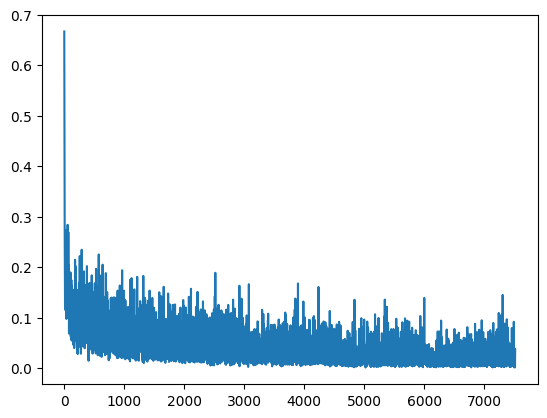

In [48]:
import matplotlib.pyplot as plt

plt.plot(loss_record)
# plt.plot(loss_record_wo_relu)

In [ ]:
len(input_tensors)

In [ ]:
torch.log(torch.tensor([1e-100]))

In [ ]:
# nan losses go back to your parameters by making nan grad, and nan weight
model.layer1.weight.data